In [1]:
#https://computational-discovery-on-jupyter.github.io/Computational-Discovery-on-Jupyter/Contents/Computing-with-Fibonacci.html

In [2]:
import numpy as np 
import scipy.linalg as la 
import time as t 
import tracemalloc as m
import matplotlib.pyplot as plt 

In [27]:
def moving_average(a, n=10) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


def check(func, funcParams, Print=False):

    #How to start recording time and memory 
    t0 = t.time()
    m.start()

    start = m.get_traced_memory()

    results = func(*funcParams)

    # displaying the memory
    end = m.get_traced_memory()
    # stopping the library
    m.stop()

    time = t.time() - t0 
    
    if Print:
        print(f'{time} s')
        print(f'First Memory: {end[0]} Max Memory: {end[1]}')

    return results, time, end

def compare(func, iterList):
    
    X = iterList 
    
    funcParams = [1]
    
    timeY = []
    memY =[]
    
    ListLen = len(iterList)
    
    for i in range(ListLen):
        print(f'{(i/ListLen*100):.2f} % complete', end = '\r')
        
        funcParams[-1] = iterList[i]
        results, time, mem = check(func, funcParams)
        
        timeY.append(time)
        memY.append(mem[1])
        
        if i == (ListLen-1):
            print()
            print(results)
    
    smoothing = 100
    
    plt.plot(X, timeY)
    plt.plot(X[smoothing-1:], moving_average(timeY, n=smoothing))
    plt.xlabel('Fibonacci number position')
    plt.ylabel('Time (s)')
    plt.yscale('log')
    plt.xscale('log')
    plt.show()
    
    plt.plot(X, memY)
    plt.plot(X[smoothing-1:], moving_average(memY, n=smoothing))
    plt.xlabel('Fibonacci number position')
    plt.ylabel('Mem (b)')
    plt.yscale('log')
    plt.xscale('log')
    plt.show()

In [15]:
def basic_loop_Fibonacci(n):
    
    if n <= 1:
        return n
    
    prev = 0
    curr = 1 
    
    for i in range(n-1):
        
        temp = curr
        curr = prev + curr 
        prev = temp
        
    return curr

In [16]:
results = check(basic_loop_Fibonacci, [1])

In [17]:
X = np.arange(10, 10**4, 10)
X = np.random.choice(X, 1000)
X = sorted(X)

2735527563382370989391137983004471704860624922475012406401564800551907436037548262801655767594985122435674298029707281226191917526155962560307838492680920673060724059911791080489426585064044697050913204734526066741700947061372992493515974681249186370611506881061466743320758753387412071895812204078618550253131367255473401226880883613529346937417631160217557402112656322970624696314274855564074973811757613437619586393172323443706101337530617953399135373615988345590215728628201673177823697073153742507910439747495827652707311630862457353049672139036189795189647877598865885128478120401328471632595605433210419695728747113570068389549391481290792753638295315729101404794964727762122483803361585422100912831537154755095072348761557640596688812328248830820037835546512780065020379995276124873774670415352654751397808184571197570163069819736558800262226038616984783094468562232253958845875317180823592127143215652925241625139244371695791088796878882533244779292198019150841532943085280641800349083872615

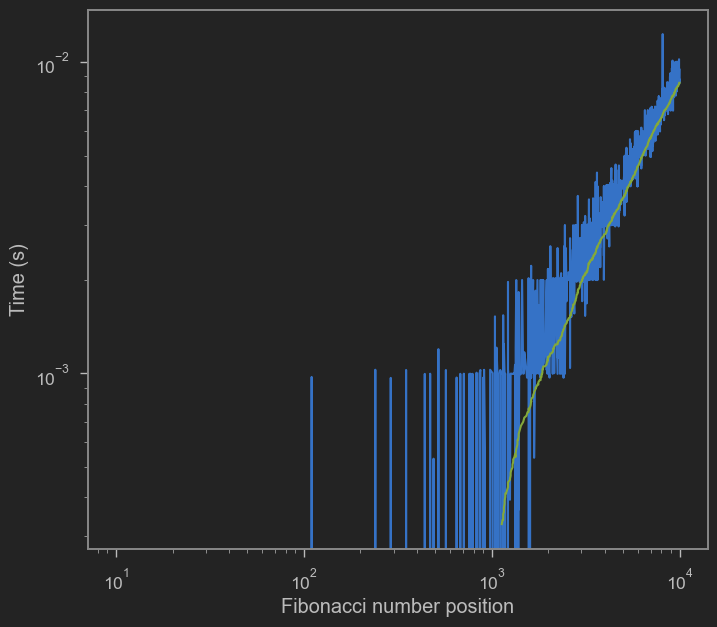

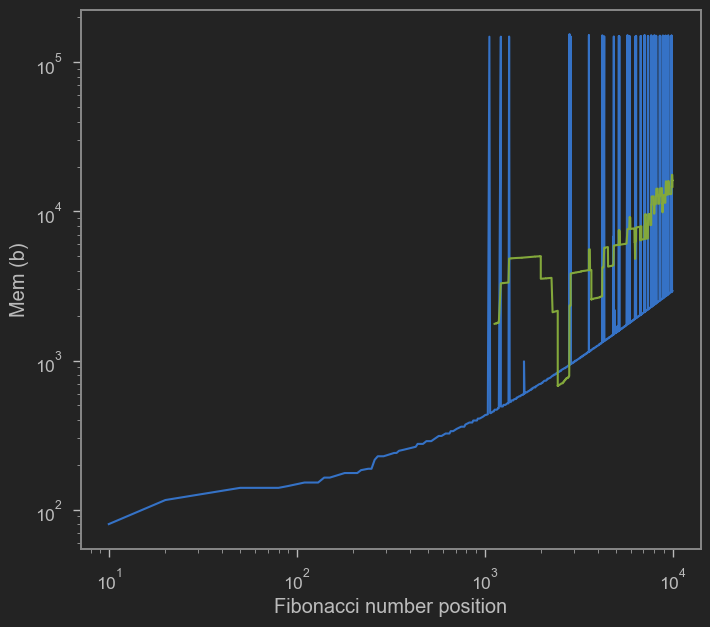

In [18]:
compare(basic_loop_Fibonacci, X)

In [19]:
def basic_recursive_Fibonacci(n):

    if n <= 1:
        return n
    else:
        return(basic_recursive_Fibonacci(n-1)+basic_recursive_Fibonacci(n-2))

In [20]:
X = np.arange(1, 30, 1)
X = np.random.choice(X, len(X))
X = sorted(X)

514229% complete


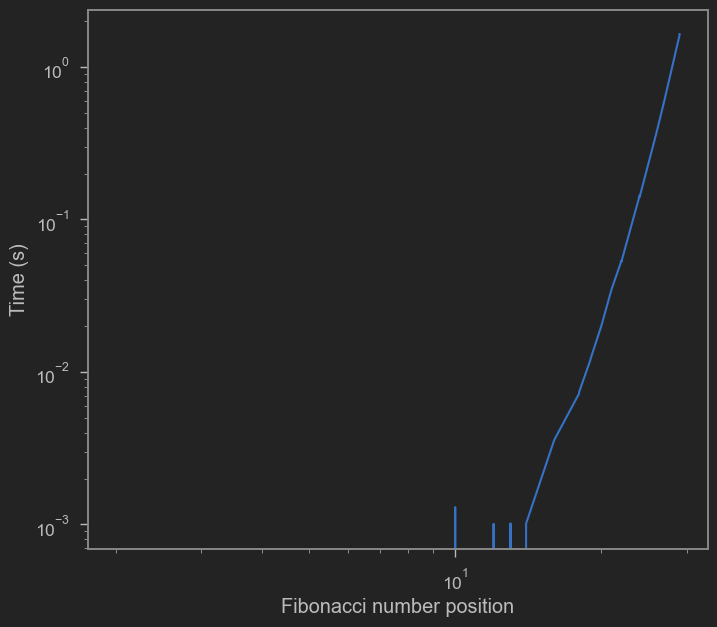

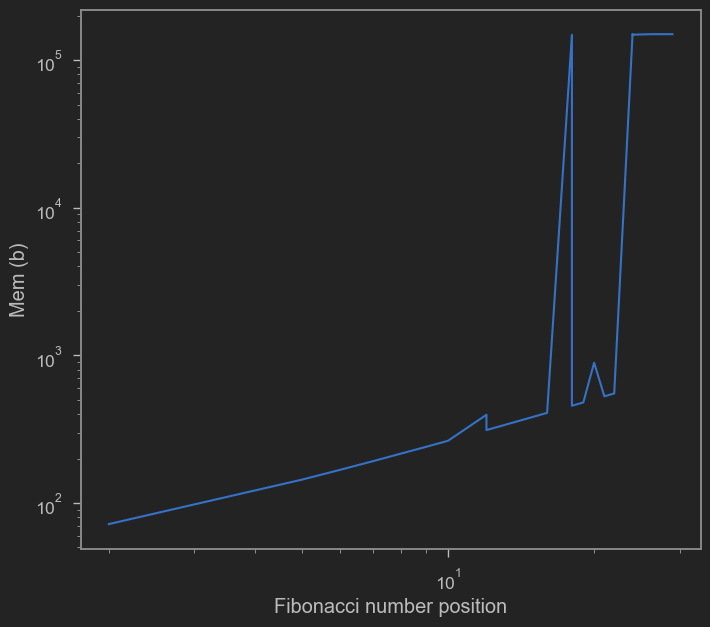

In [21]:
compare(basic_recursive_Fibonacci, X)

In [22]:
def basic_matrix_Fibonacci(n):
    
    if n <= 1:
        return n
    
    n -= 1
    
    matrix = np.array([[1, 1], [1, 0]])
    
    vec = np.array([1, 0]).reshape(-1, 1)
    
    result_matrix = matrix
    
    for i in range(n-1):
        
        result_matrix = np.dot(result_matrix, matrix)

    vec = np.dot(result_matrix, vec)
    
    return int(vec[0])

In [23]:
basic_matrix_Fibonacci(7)

13

In [24]:
X = np.arange(10, 10000, 1)
X = np.random.choice(X, 100)
X = sorted(X)

314873282omplete


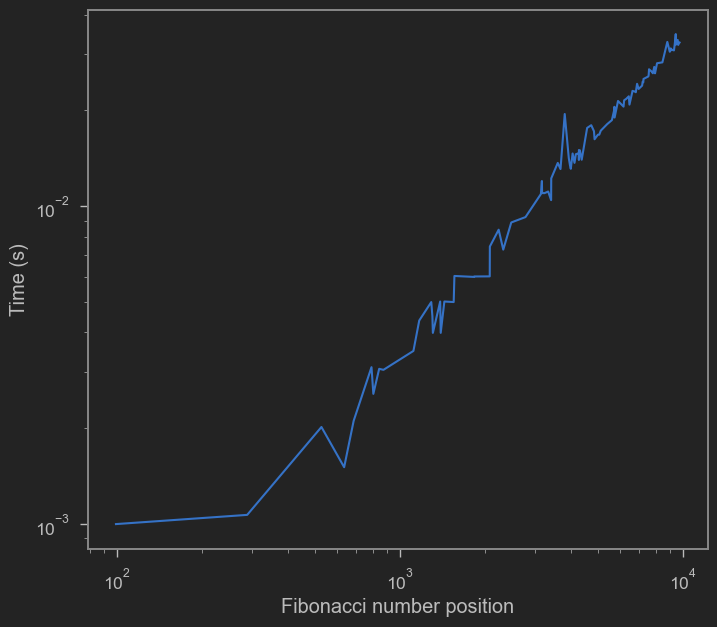

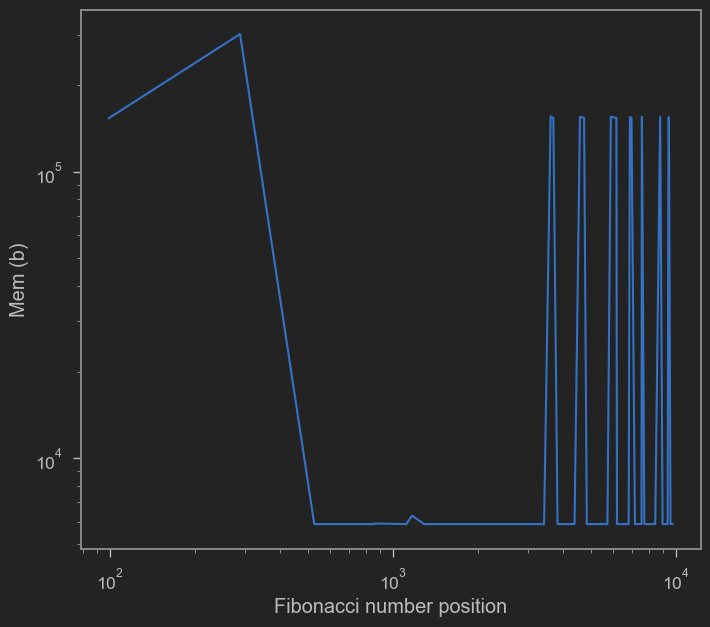

In [25]:
compare(basic_matrix_Fibonacci, X)

In [28]:
#Fast O(N) and works for very large n
def basic_pisano_Fibonacci(n):
    
    m = 15*10**99
    
    if n <= 1:
        return n

    arr = [0, 1]
    previousMod = 0
    currentMod = 1

    for i in range(n - 1):
        tempMod = previousMod
        previousMod = currentMod % m
        currentMod = (tempMod + currentMod) % m
        arr.append(currentMod)
        if currentMod == 1 and previousMod == 0:
            index = (n % (i + 1))
            return arr[index]

    return currentMod

In [35]:
X = np.arange(10, 100000, 10)
X = np.random.choice(X, 100)
X = sorted(X)

99.00 % complete
2450251389981725460074377692448869471375481015555445877623565699030824268675310487721487316270007695


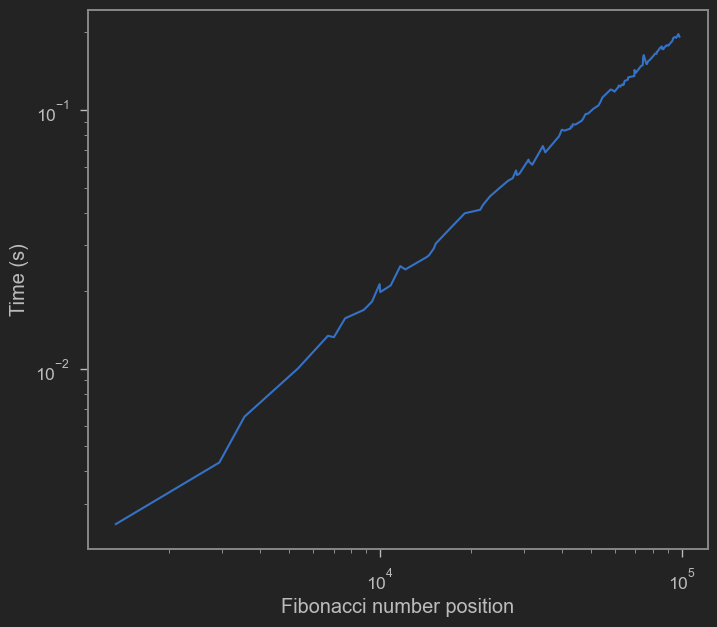

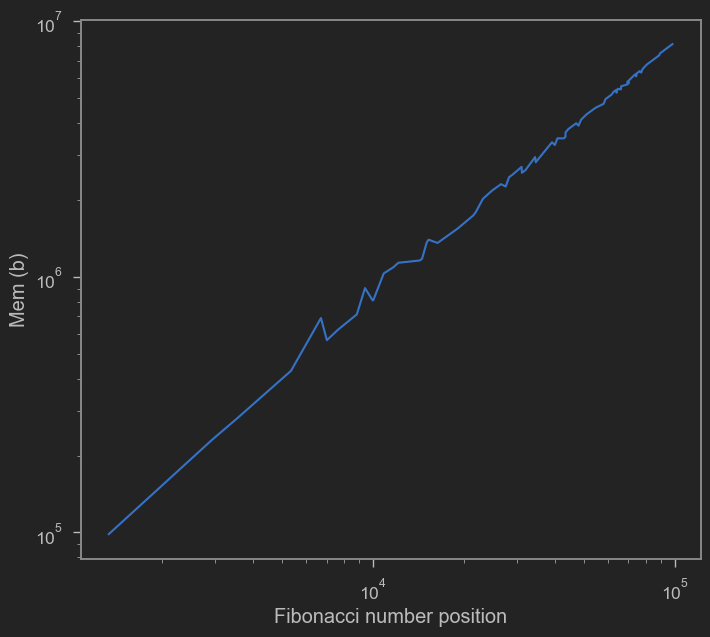

In [36]:
compare(basic_pisano_Fibonacci, X)

In [37]:
#Instant O(1) but works as long as n < 1000

def basic_eigen_Fibonacci(n):
    
    if n <= 1:
        return n
    
    n -= 1
    
    e1 = (1+5**0.5)/2
    e2 = (1-5**0.5)/2
    
    v1 = 1/(2*(5)**0.5)*np.array([1+5**0.5, 2])
    v2 = -1/(2*(5)**0.5)*np.array([1-5**0.5, 2])
    
    ans = v1*e1**n+v2*e2**n
    
    try:
        return int(round(ans[0], 0))
    except OverflowError:
        return round(ans[0], 0)

In [46]:
X = np.arange(10, 1000, 1)
X = np.random.choice(X, 100)
X = sorted(X)

99.00 % complete
571829406815652922357695970258509236989354849755129839375281390733071169588126989913044242434127968125521674133538627250412975726092083025666691994105430131033556786893383868853595709800456396951291800059904


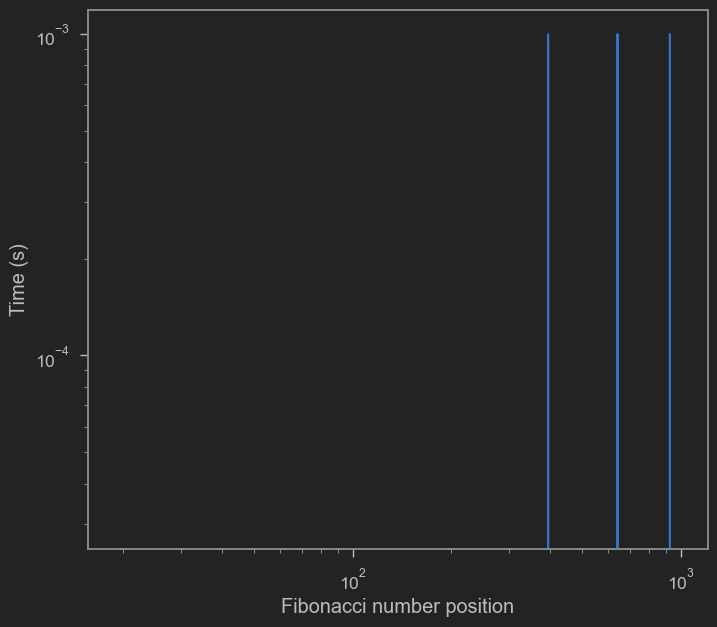

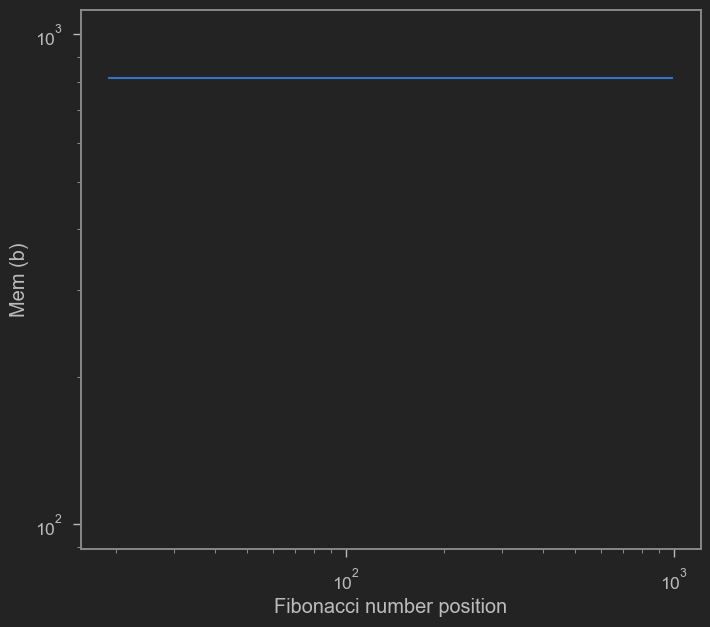

In [47]:
compare(basic_eigen_Fibonacci, X)

In [93]:
#Fast O(1) as long as n < 1000 but n can be a complex number 
def basic_continuous_Fibonacchi(n):
    
    s = (1+5**0.5)/2 
    
    a = s**n
    b = np.cos(np.pi*n)*(s**-n)
    
    ans = (a-b)/(5**0.5)
    
    return round(ans)

In [94]:
X = np.arange(10, 1000, 1)
X = np.random.choice(X, 100)
X = sorted(X)

99.00 % complete
26863810024486259428057328890462071226932128417886493703576991815165644098340129752887649389042242022037970113428562978866498563272624804026557522173602820491641993157883791984718503223913747590579636943192064


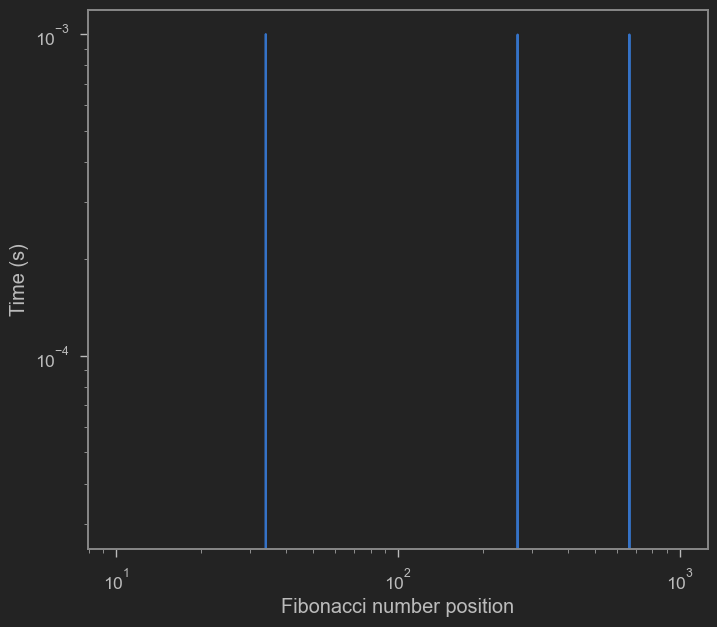

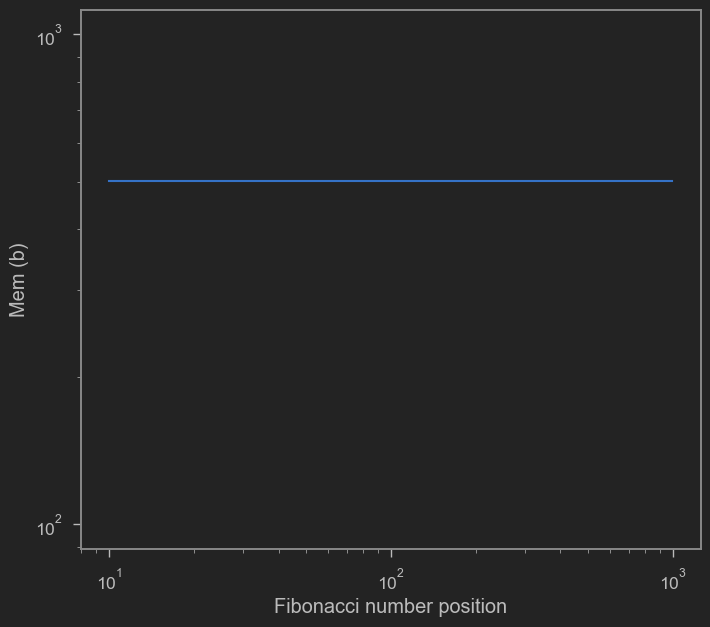

In [95]:
compare(basic_continuous_Fibonacchi, X)

In [118]:
#Fast O(1) as long as n < 1000 but n can be a complex number 
def basic_decimals_Fibonacchi(n):
    
    n = 10**-n
    
    z = n/(1-n-n**2)
    
    return z

In [119]:
basic_decimals_Fibonacchi(2)

0.010102030508132135

In [96]:
for i in range (10):
    print(basic_loop_Fibonacci(i), basic_recursive_Fibonacci(i), 
          basic_matrix_Fibonacci(i), basic_pisano_Fibonacci(i), 
          basic_eigen_Fibonacci(i), basic_continuous_Fibonacchi(i))

0 0 0 0 0 0
1 1 1 1 1 1
1 1 1 1 1 1
2 2 2 2 2 2
3 3 3 3 3 3
5 5 5 5 5 5
8 8 8 8 8 8
13 13 13 13 13 13
21 21 21 21 21 21
34 34 34 34 34 34


In [97]:
10/89

0.11235955056179775